In [3]:
%matplotlib inline

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
# jtplot.style()
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='', theme='grade3')

In [6]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from glob import glob

from parse_utils import load_perf_file, get_metric, compare_metrics, load_perf_folder, load_perf_superfolders

# import seaborn as sns
# sns.set_style('whitegrid')

In [269]:
%%bash
ls data/m6148_out

out_ram_lzma_nosplit
out_ram_lzma_nosplit_cache
out_ram_lzma_nosplit_index
out_ram_lzma_nosplit_index_cache
out_ram_lzma_split
out_ram_lzma_split_cache
out_ram_lzma_split_index
out_ram_lzma_split_index_cache
out_ram_zlib_nosplit
out_ram_zlib_nosplit_cache
out_ram_zlib_nosplit_index
out_ram_zlib_nosplit_index_cache
out_ram_zlib_split
out_ram_zlib_split_cache
out_ram_zlib_split_index
out_ram_zlib_split_index_cache
out_sam


In [310]:
df = load_perf_superfolders(['opladev47/6148s100_out'])
df_ram = df[df['method']=='ramtools']
df_sam = df[df['method']=='samtools']
df_ram_index = df_ram[df_ram['index']]

In [271]:
dfi = pd.read_csv('data/samexample_views.csv', index_col=0)
regions = dfi['rname']+':'+dfi['start'].astype(str)+'-'+dfi['end'].astype('str')

In [272]:
start, end = 10, 20
start, end = 0, 20
relative = None

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]), <a list of 20 Text xticklabel objects>)

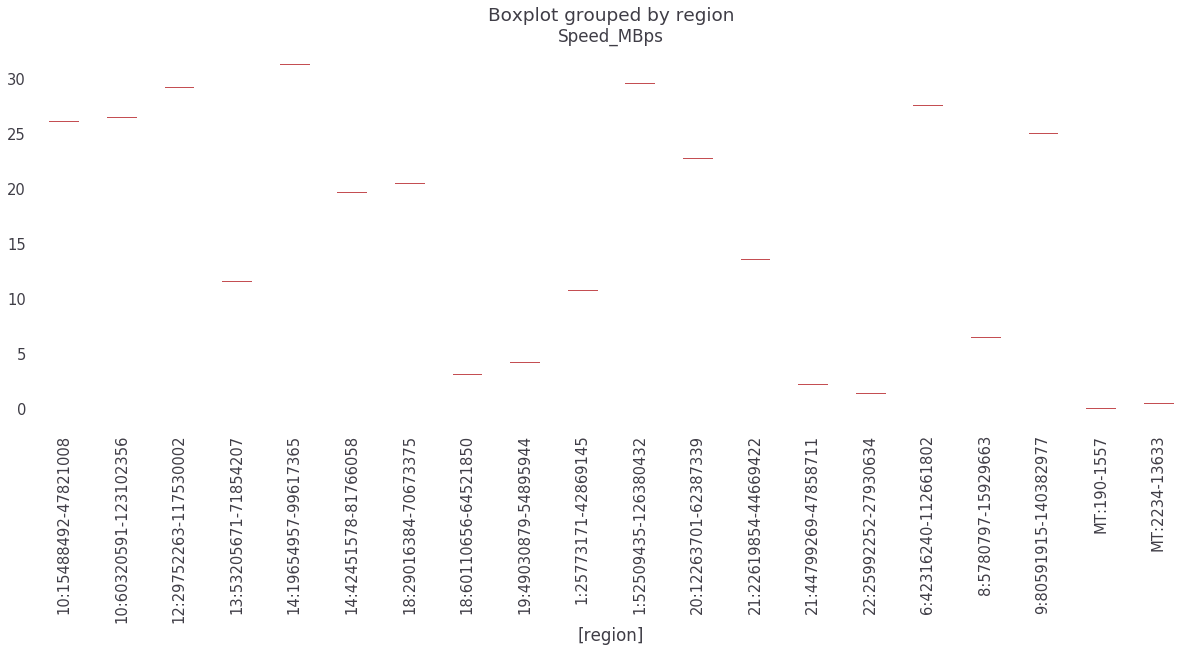

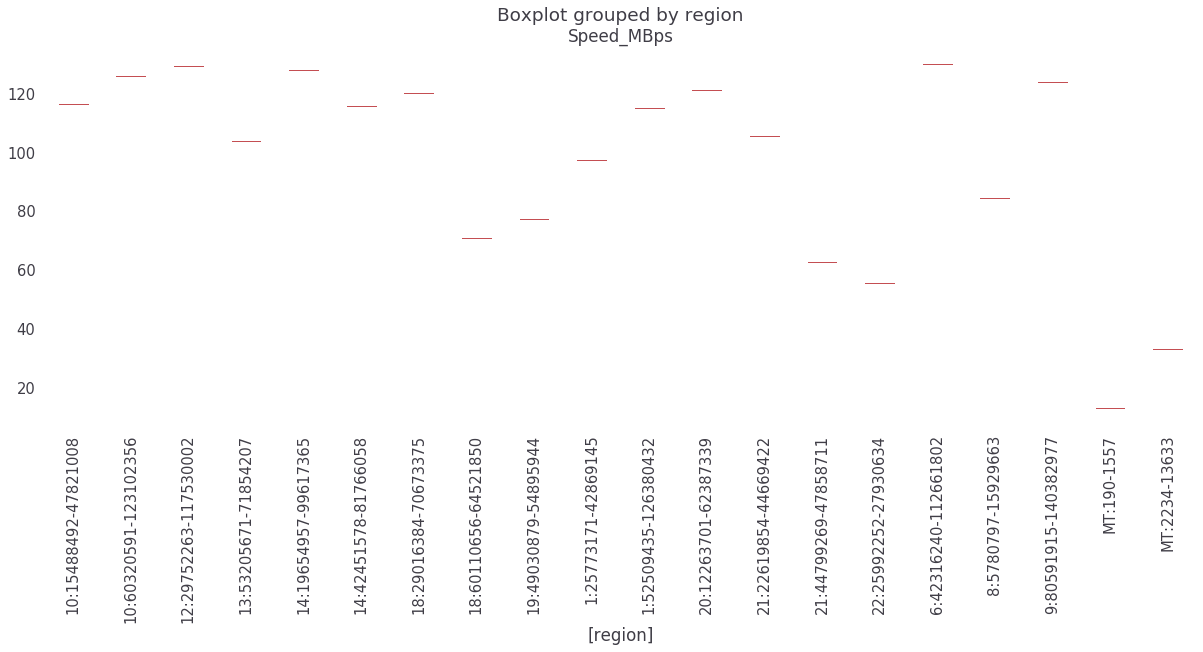

In [273]:
df_ram.query('alg=="zlib" and split==True and index==True and cache==False').boxplot('Speed_MBps', by=['region'], figsize=(20,7))
plt.xticks(rotation=90)
df_sam.boxplot('Speed_MBps', by=['region'], figsize=(20,7))
plt.xticks(rotation=90)


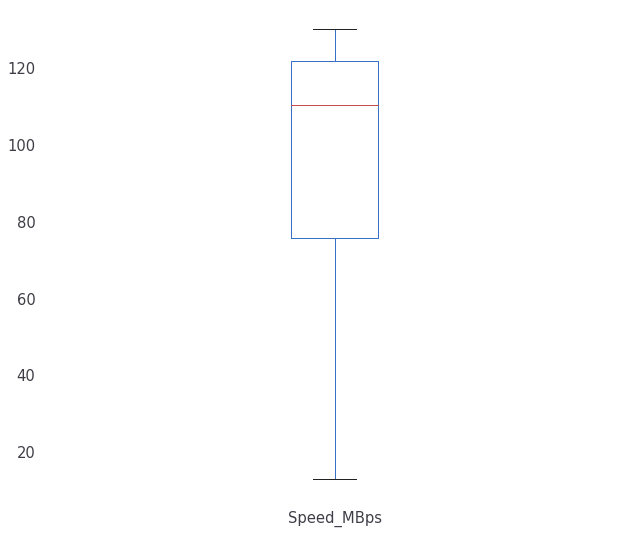

In [274]:
df_sam.boxplot('Speed_MBps')

In [370]:
len(sdf[sdf.method == 'samtools']['Speed_MBps'])

20

In [369]:
len(sdf[sdf.method == 'ramtools']['Speed_MBps'])

20

In [379]:
np.median

<function numpy.lib.function_base.median>

In [381]:
sdf = df.query('(method == "samtools") or ( (method == "ramtools") and (alg == "zlib") and (cache == False) and (split == True) and (index == True) )')
(sdf[sdf.method == 'samtools']['Speed_MBps'].values / (sdf[sdf.method == 'ramtools']['Speed_MBps']).values)

array([   4.4551026 ,    4.75720413,    4.42883975,    8.99216446,
          4.09442537,    5.89080837,    5.85185481,   22.63170162,
         18.41608719,    9.06699736,    3.89077215,    5.31018979,
          7.75793921,   27.5275406 ,   40.15904579,    4.70733831,
         13.03998507,    4.94974473,  211.71303357,   63.74652101])

In [308]:
def mean_std(x):
    return np.mean(x)/np.std(x)

In [361]:
df_ram.groupby(['index', 'alg', 'split', 'cache'], as_index=False).agg({'Speed_MBps':['mean','std',mean_std], 'genome':'first'},).sort_values( ('Speed_MBps', 'mean'), ascending=False)

index   alg  split  cache Speed_MBps                         genome
                                    mean        std  mean_std     first
14   True  zlib   True  False  15.625196  11.349401  1.412507  6148s100
12   True  zlib  False  False  13.847223  10.223910  1.389581  6148s100
15   True  zlib   True   True  13.740035   9.711016  1.451648  6148s100
13   True  zlib  False   True  13.532289   9.890149  1.403805  6148s100
4   False  zlib  False  False   9.277429   7.749304  1.228296  6148s100
5   False  zlib  False   True   7.891704   7.328056  1.104893  6148s100
8    True  lzma  False  False   4.385123   3.306884  1.360508  6148s100
9    True  lzma  False   True   4.321813   3.240631  1.368279  6148s100
10   True  lzma   True  False   3.404873   2.733004  1.278200  6148s100
6   False  zlib   True  False   3.364354   6.013522  0.573999  6148s100
11   True  lzma   True   True   3.355624   2.665277  1.291722  6148s100
7   False  zlib   True   True   2.957906   5.018553  0.604706  6148s100
3   False  lzma   True   True   2.800922   2.350743  1.222458  6148s100
2   False  lzma   True  False   2.799211   2.360527  1.216648  6148s100
1   False  lzma  False   True   0.809265   1.587535  0.523005  6148s100
0   False  lzma  False  False   0.802784   1.534012  0.536918  6148s100

In [ ]:
df_ram.groupby(['index', 'alg', 'split', 'cache'], group_keys=False).mean

In [196]:
# import patsy
# f = 'Speed_MBps ~ C(alg)*C(split)'
# y, X = patsy.dmatrices(f, df, return_type='dataframe')


In [237]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [235]:
mod = ols('Speed_MBps ~ C(split)*C(alg)', data=df_ram).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(split),131.255229,1.0,3.373637,6.718647e-02
C(alg),1689.288457,1.0,43.419568,1.848287e-10
C(split):C(alg),58.172148,1.0,1.495191,2.223239e-01
Residual,12294.345113,316.0,NaN,NaN


In [250]:
mod = ols('Speed_MBps ~ C(index)*C(alg)*C(split)', data=df_ram).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table[aov_table['PR(>F)'] < 0.05]

,sum_sq,df,F,PR(>F)
C(index),1944.654861,1.0,63.644822,2.859747e-14
C(alg),1689.288457,1.0,55.287169,1.012604e-12
C(split),131.255229,1.0,4.295732,3.902902e-02
C(index):C(alg),345.084772,1.0,11.293962,8.742207e-04
C(index):C(split),470.284261,1.0,15.391501,1.075148e-04


/home/josejavier/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/matplotlib/cbook.py:1985: RuntimeWarning: invalid value encountered in double_scalars
  notch_min = med - 1.57 * iqr / np.sqrt(N)


(array([1, 2]), <a list of 2 Text xticklabel objects>)

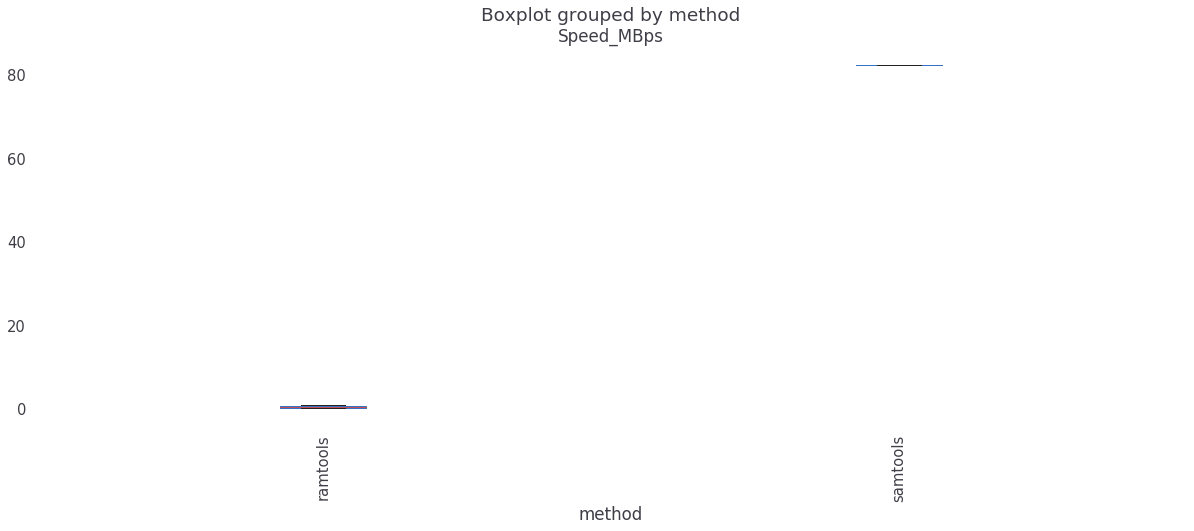

In [166]:
df.boxplot('Speed_MBps', by='method', figsize=(20,7))
plt.xticks(rotation=90)


In [102]:
# bool_opt = (True, False)
# for alg, split, index, cache, memlim in product( ('zlib', 'lzma'), bool_opt, bool_opt, bool_opt, bool_opt):
       
#     sdf = df[(df['method']=='ramtools') & (df['alg']==alg) & (df['split']==split) & (df['index']==index) & (df['cache'] == cache) & (df['memlim']==memlim)]
#     print('{0:.2f}'.format(sdf['Speed_MBps'].mean()), end=' +- ')
#     print('{0:.2f}'.format(sdf['Speed_MBps'].std()), end=' ')
#     print(alg, split, index, cache, memlim)


0.62 +- 0.47 zlib True True True True
0.52 +- 0.39 zlib True True True False
0.61 +- 0.46 zlib True True False True
0.53 +- 0.40 zlib True True False False
0.57 +- 0.40 zlib True False True True
0.49 +- 0.36 zlib True False True False
0.58 +- 0.43 zlib True False False True
0.54 +- 0.40 zlib True False False False
0.56 +- 0.39 zlib False True True True
0.54 +- 0.40 zlib False True True False
0.58 +- 0.43 zlib False True False True
0.50 +- 0.36 zlib False True False False
0.58 +- 0.40 zlib False False True True
0.55 +- 0.40 zlib False False True False
0.60 +- 0.49 zlib False False False True
0.53 +- 0.41 zlib False False False False
0.53 +- 0.40 lzma True True True True
0.49 +- 0.35 lzma True True True False
0.49 +- 0.34 lzma True True False True
0.49 +- 0.36 lzma True True False False
0.57 +- 0.44 lzma True False True True
0.51 +- 0.37 lzma True False True False
0.47 +- 0.42 lzma True False False True
0.44 +- 0.27 lzma True False False False
0.50 +- 0.30 lzma False True True True
0.52 